In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 20.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4250d9b98589bd570ef7e8a34530159af1b6ef5e28a6e877c9cb390fa9232ac7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


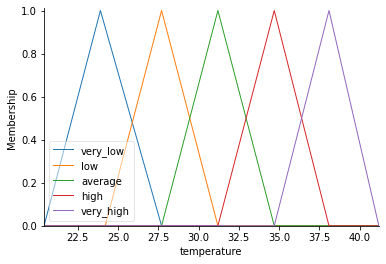

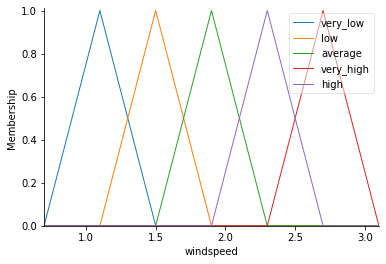

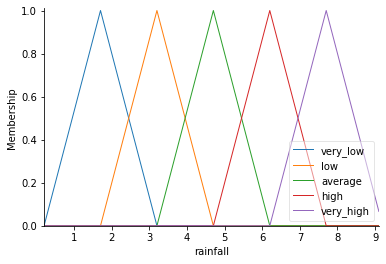

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temperature = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temperature')
windspeed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'windspeed')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rainfall')
temperature['very_low'] = fuzz.trimf(temperature.universe,[20.4,23.9,27.7])
temperature['low'] = fuzz.trimf(temperature.universe,[24.2,27.7,31.2])
temperature['average'] = fuzz.trimf(temperature.universe,[27.7,31.2,34.7])
temperature['high'] = fuzz.trimf(temperature.universe,[31.2,34.7,38.1])
temperature['very_high'] = fuzz.trimf(temperature.universe,[34.7,38.1,41.2])

windspeed['very_low'] = fuzz.trimf(windspeed.universe,[0.7,1.1,1.5])
windspeed['low'] = fuzz.trimf(windspeed.universe,[1.1,1.5,1.9])
windspeed['average'] = fuzz.trimf(windspeed.universe,[1.5,1.9,2.3])
windspeed['very_high'] = fuzz.trimf(windspeed.universe,[2.3,2.7,3.1])
windspeed['high'] = fuzz.trimf(windspeed.universe,[1.9,2.3,2.7])

rainfall['very_low'] = fuzz.trimf(rainfall.universe,[0.2,1.7,3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe,[1.7,3.2,4.7])
rainfall['average'] = fuzz.trimf(rainfall.universe,[3.2,4.7,6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe,[4.7,6.2,7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe,[6.2,7.7,9.2])
temperature.view()
windspeed.view()
rainfall.view()

In [3]:
rule1 = ctrl.Rule(temperature['very_low'] & windspeed['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(temperature['very_low'] & windspeed['low'], rainfall['very_low'])
rule3 = ctrl.Rule(temperature['very_low'] & windspeed['average'], rainfall['very_low'])
rule4 = ctrl.Rule(temperature['very_low'] & windspeed['high'], rainfall['low'])
rule5 = ctrl.Rule(temperature['very_low'] & windspeed['very_high'], rainfall['low'])

rule6 = ctrl.Rule(temperature['low'] & windspeed['very_low'], rainfall['very_low'])
rule7 = ctrl.Rule(temperature['low'] & windspeed['low'], rainfall['very_low'])
rule8 = ctrl.Rule(temperature['low'] & windspeed['average'], rainfall['low'])
rule9 = ctrl.Rule(temperature['low'] & windspeed['high'], rainfall['low'])
rule10 = ctrl.Rule(temperature['low'] & windspeed['very_high'], rainfall['average'])

rule11 = ctrl.Rule(temperature['average'] & windspeed['very_low'], rainfall['low'])
rule12 = ctrl.Rule(temperature['average'] & windspeed['low'], rainfall['average'])
rule13 = ctrl.Rule(temperature['average'] & windspeed['average'], rainfall['average'])
rule14 = ctrl.Rule(temperature['average'] & windspeed['high'], rainfall['average'])
rule15 = ctrl.Rule(temperature['average'] & windspeed['very_high'], rainfall['high'])

rule16 = ctrl.Rule(temperature['high'] & windspeed['very_low'], rainfall['low'])
rule17 = ctrl.Rule(temperature['high'] & windspeed['low'], rainfall['average'])
rule18 = ctrl.Rule(temperature['high'] & windspeed['average'], rainfall['high'])
rule19 = ctrl.Rule(temperature['high'] & windspeed['high'], rainfall['high'])
rule20 = ctrl.Rule(temperature['high'] & windspeed['very_high'], rainfall['very_high'])

rule21 = ctrl.Rule(temperature['very_high'] & windspeed['very_low'], rainfall['very_low'])
rule22 = ctrl.Rule(temperature['very_high'] & windspeed['low'], rainfall['low'])
rule23 = ctrl.Rule(temperature['very_high'] & windspeed['average'], rainfall['average'])
rule24 = ctrl.Rule(temperature['very_high'] & windspeed['high'], rainfall['high'])
rule25 = ctrl.Rule(temperature['very_high'] & windspeed['very_high'], rainfall['high'])

In [4]:
rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])


3.9432545544066944


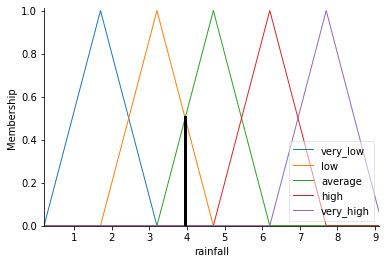

In [5]:
rain = ctrl.ControlSystemSimulation(rain_ctrl)
rain.input['temperature'] = 25
rain.input['windspeed'] = 4
rain.compute()
print(rain.output['rainfall'])
rainfall.view(sim = rain)